# **CHD (Coronary Heart Disease) Case Study and Analysis.**

##1. Introduction

Heart disease refers to various types of conditions that can affect heart function. These types include:
1. Coronary artery (atherosclerotic) disease: Disease that affects the blood supply to the heart.

2. Valvular heart disease: Disease that affects how the valves function to regulate blood flow in and out of the heart.
3. Cardiomyopathies: Disease that affect heart muscles, heart rhythm disturbances
4. Arrhythmias: Disease that affect the electrical conduction and congenital heart diseases where the heart has structural problems that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated **17.9 million** people died from heart diseases in 2016, representing **31%** of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greately improve their prognoses.

It is, however, difficult to identify high risk patients because of the mulfactorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol etc. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML), due to its superiority in pattern detection and classification, proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry on heart disease.
>In this notebook, I will be exploring different Machine Learning approaches for predicting wheather a patient has 10-year risk of developing coronary heart disease (CHD) using the Framingham dataset that is publicly availabe on Kaggle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

## 2. Dataset


###Source:

The dataset is publically available on kaggle and it is from an ongoing cardiovascular study.The dataset provides the patients’ information.The dataset provides the patients’ information.
>The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

### Attributes:

1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

13. ca: The number of major vessels (0-3)

14. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

15. target: Heart disease (0 = no, 1 = yes)


>> ***Factors:***

Heart disease risk factors to the following:

*   High cholesterol
*   High blood pressure
*   Diabetes
*   Weight
*   Family history
*   Smoking

According to another source , the major factors that can't be changed are:
* Increasing age
* Male gender
* Heredity.

> **thalassemia**, one of the variables in this dataset, is **Heredity**.

Major **factors that can be modified** are:
* Smoking
* High cholesterol
* High blood pressure
* Physical inactivity
* Being overweight
* Having Diabetes.

Other factors include stress, alcohol and poor diet/nutrition.

In [ ]:
# Read heart disease details file
data = pd.read_csv('heart.csv')

In [ ]:
# check data-type
type(data)

pandas.core.frame.DataFrame

In [ ]:
# View first 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Cnverting float value to Int**

In [ ]:
# Convert 'oldpeak' column to integer
data['oldpeak'] = data['oldpeak'].astype(int)
# After conversion
print(data['oldpeak'])

0      2
1      3
2      1
3      0
4      0
      ..
298    0
299    1
300    3
301    1
302    0
Name: oldpeak, Length: 303, dtype: int64


## Check if there is any null value in the Dataset


In [ ]:
#Checking Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Null Value Check
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

**so, we have no null value in Dataset.**

## Check Shape of Dataset

data.shape is used to get the dimensions of the DataFrame or Series. It returns a tuple representing the dimensionality of the DataFrame or Series. The returned tuple consists of two values:

* The first value is the number of rows.
* The second value is the number of columns.

For example, if you have a DataFrame data with 5 rows and 3 columns, data.shape will return (5, 3)

In [ ]:
# Shape of the data
data.shape

(303, 14)

## Describing the Dataset

data.describe() is used to generate descriptive statistics of a DataFrame or Series. It provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values.

what it returns for a DataFrame:

* count: Number of non-null observations.
* mean: Mean of the values.
* std: Standard deviation of the observations.
* min: Minimum of the values in the object.
* 25%: The first quartile or 25th percentile.
* 50%: The second quartile or median or 50th percentile.
* 75%: The third quartile or 75th percentile.
* max: Maximum of the values in the object.

In [ ]:
# Descriptive summary
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Descriptive summary for Numeric and Categorical variables
data.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 1. What is the percentage of patient with or without heart problems in the given dataset ?

In [ ]:
y = data["target"]

1    165
0    138
Name: target, dtype: int64

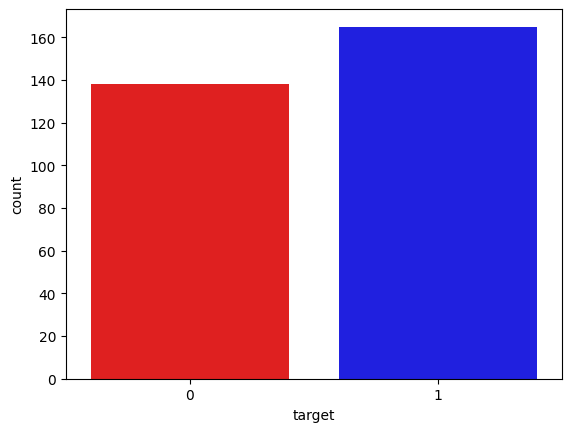

In [ ]:
custom_palette = {'0': 'red', '1': 'blue'}
sns.countplot(x='target', data=data, palette=custom_palette)
target_temp = data.target.value_counts()
target_temp

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

## Representation of Data in Pie Chart

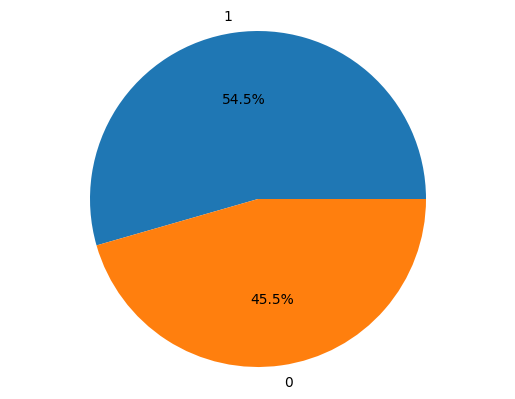

In [ ]:

target_temp = data['target'].value_counts()

plt.pie(target_temp, labels=target_temp.index,  autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

> Here, 0 is Female and 1 is Male

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)) + "%")

print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)) + "%")

Percentage of patients without heart problems: 45.54%
Percentage of patients with heart problems: 54.46%


## 2. What is the sex Wise ratio of Coronary Heart Disease Patients?

In [ ]:
data["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

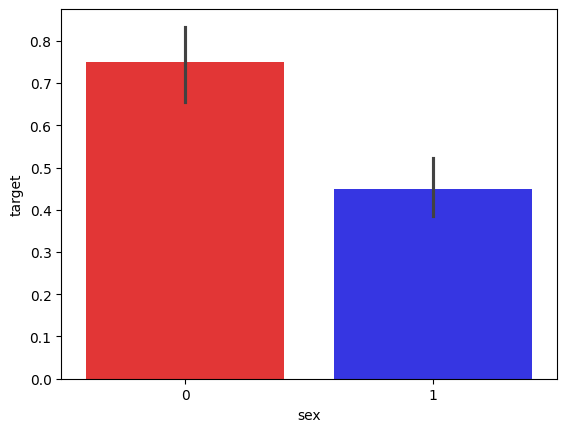

In [ ]:
custom_palette = {'0': 'red', '1': 'blue'}
sns.barplot(x='sex', y='target', data=data, palette=custom_palette, alpha=0.9)

Here, 0 is Female and 1 is Male

In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


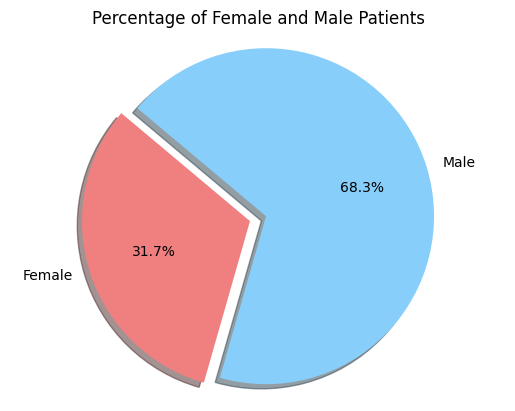

In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
totalPatients = len(data)
percent_female = (countFemale / totalPatients) * 100
percent_male = (countMale / totalPatients) * 100

# Pie chart
labels = ['Female', 'Male']
sizes = [percent_female, percent_male]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice (i.e., 'Female')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Female and Male Patients')
plt.show()


The variable categorial appears to be a list of tuples where each tuple contains the name of a categorical variable along with its possible categories. This structure can be useful for various purposes, particularly in data analysis and visualization tasks. Here's how each element can be interpreted:

* The first element of each tuple is the name of a categorical variable.
* The second element of each tuple is a list containing the possible categories for that variable.

## Wat is the Category wise division of each value?

In [ ]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [ ]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [ ]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

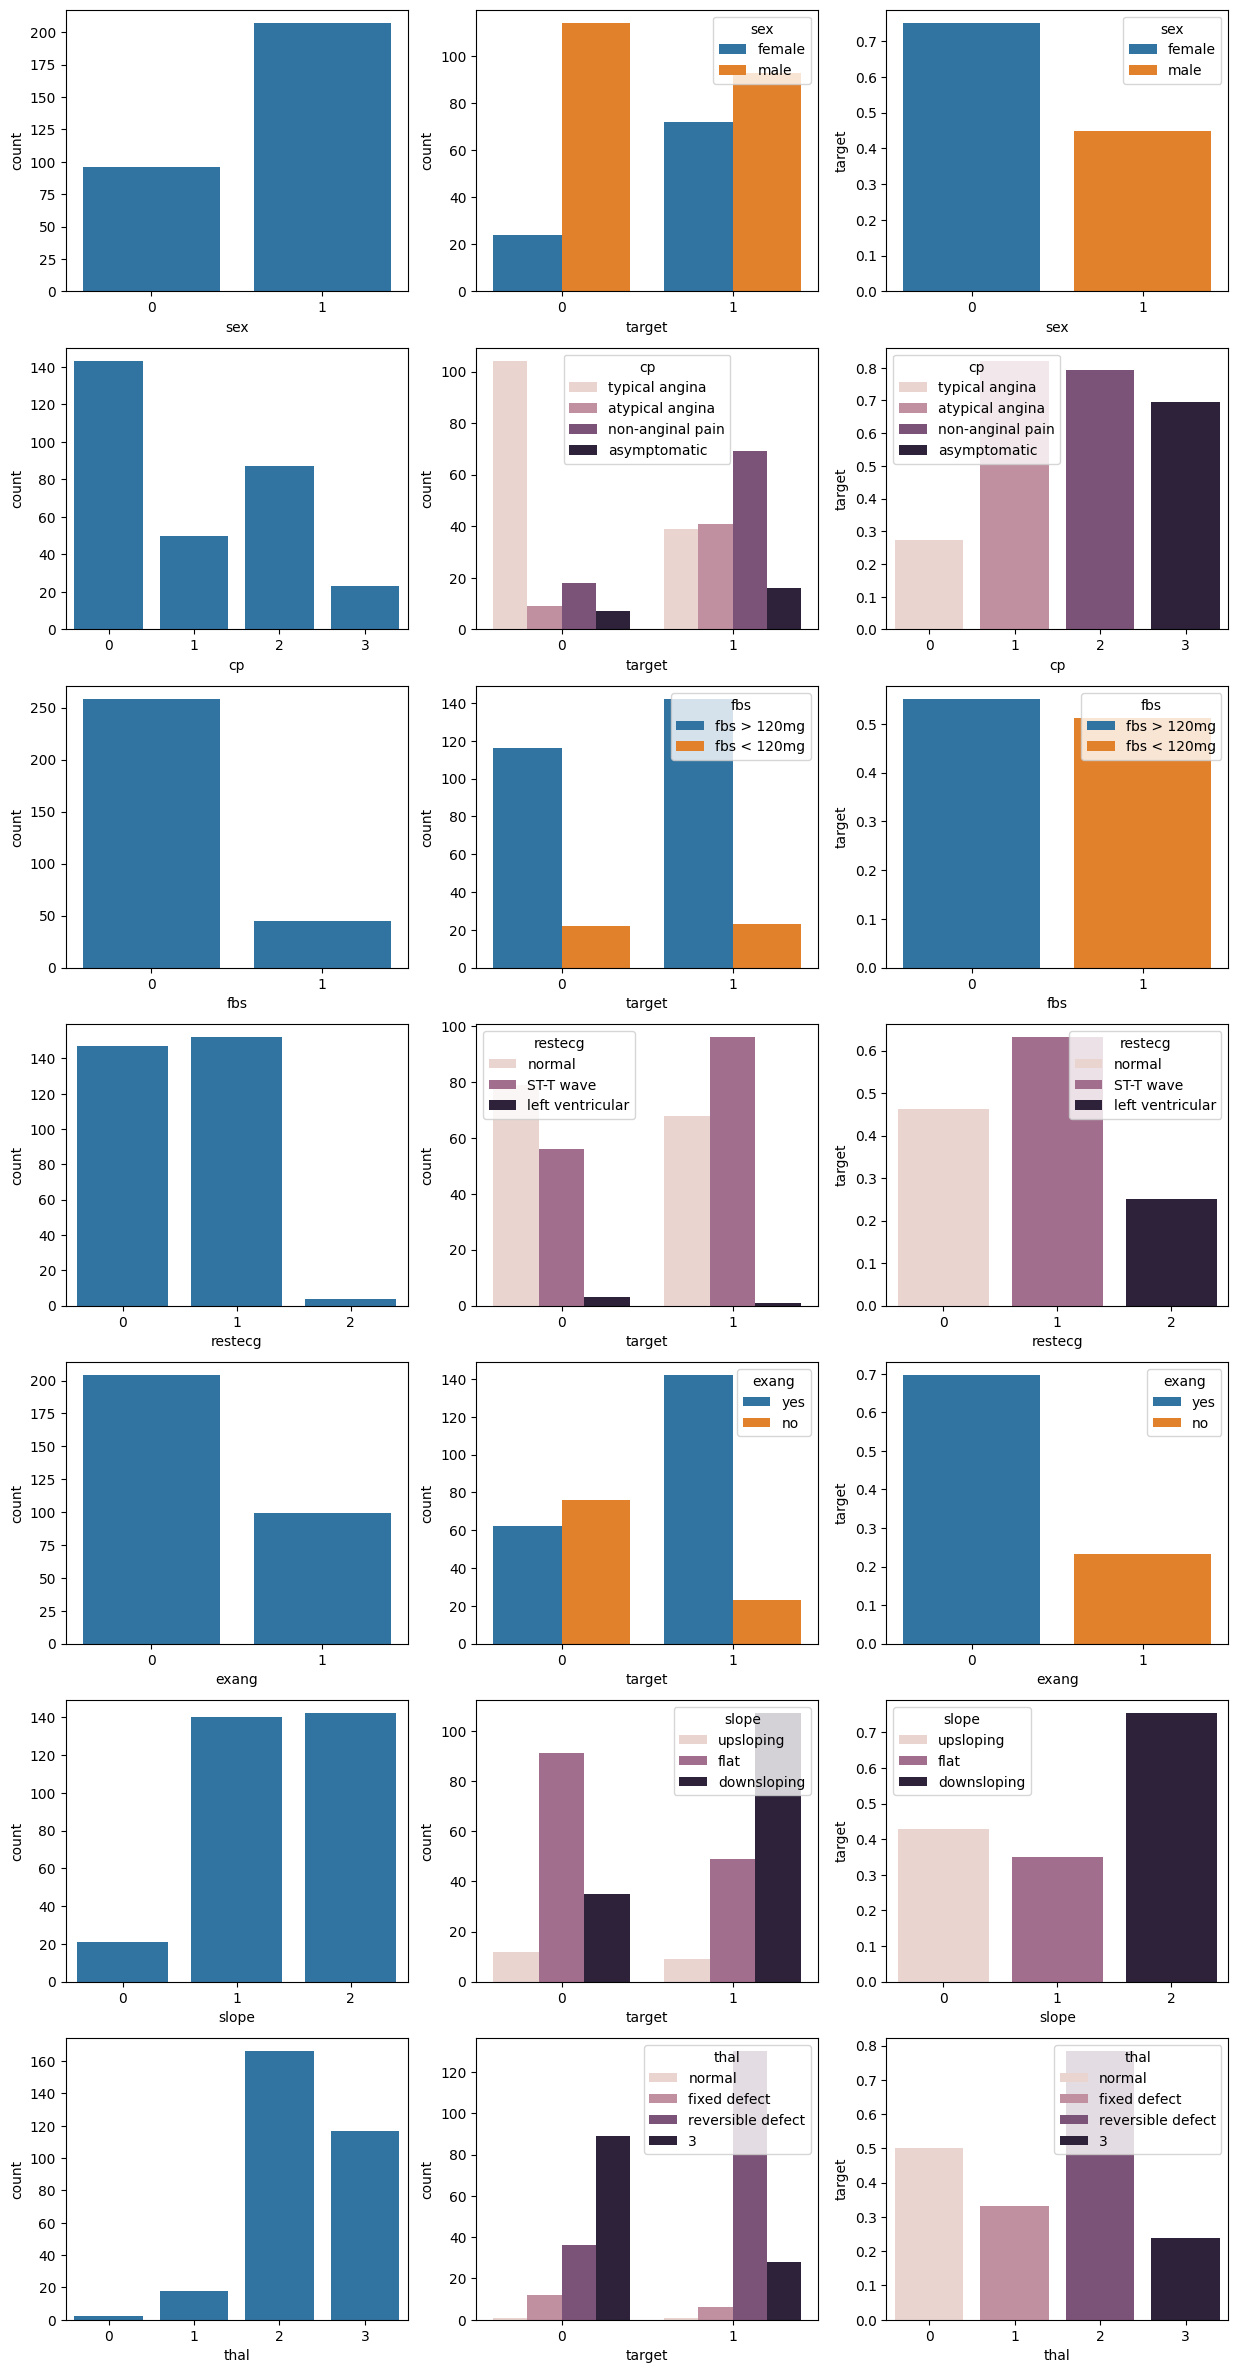

In [ ]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [ ]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [ ]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

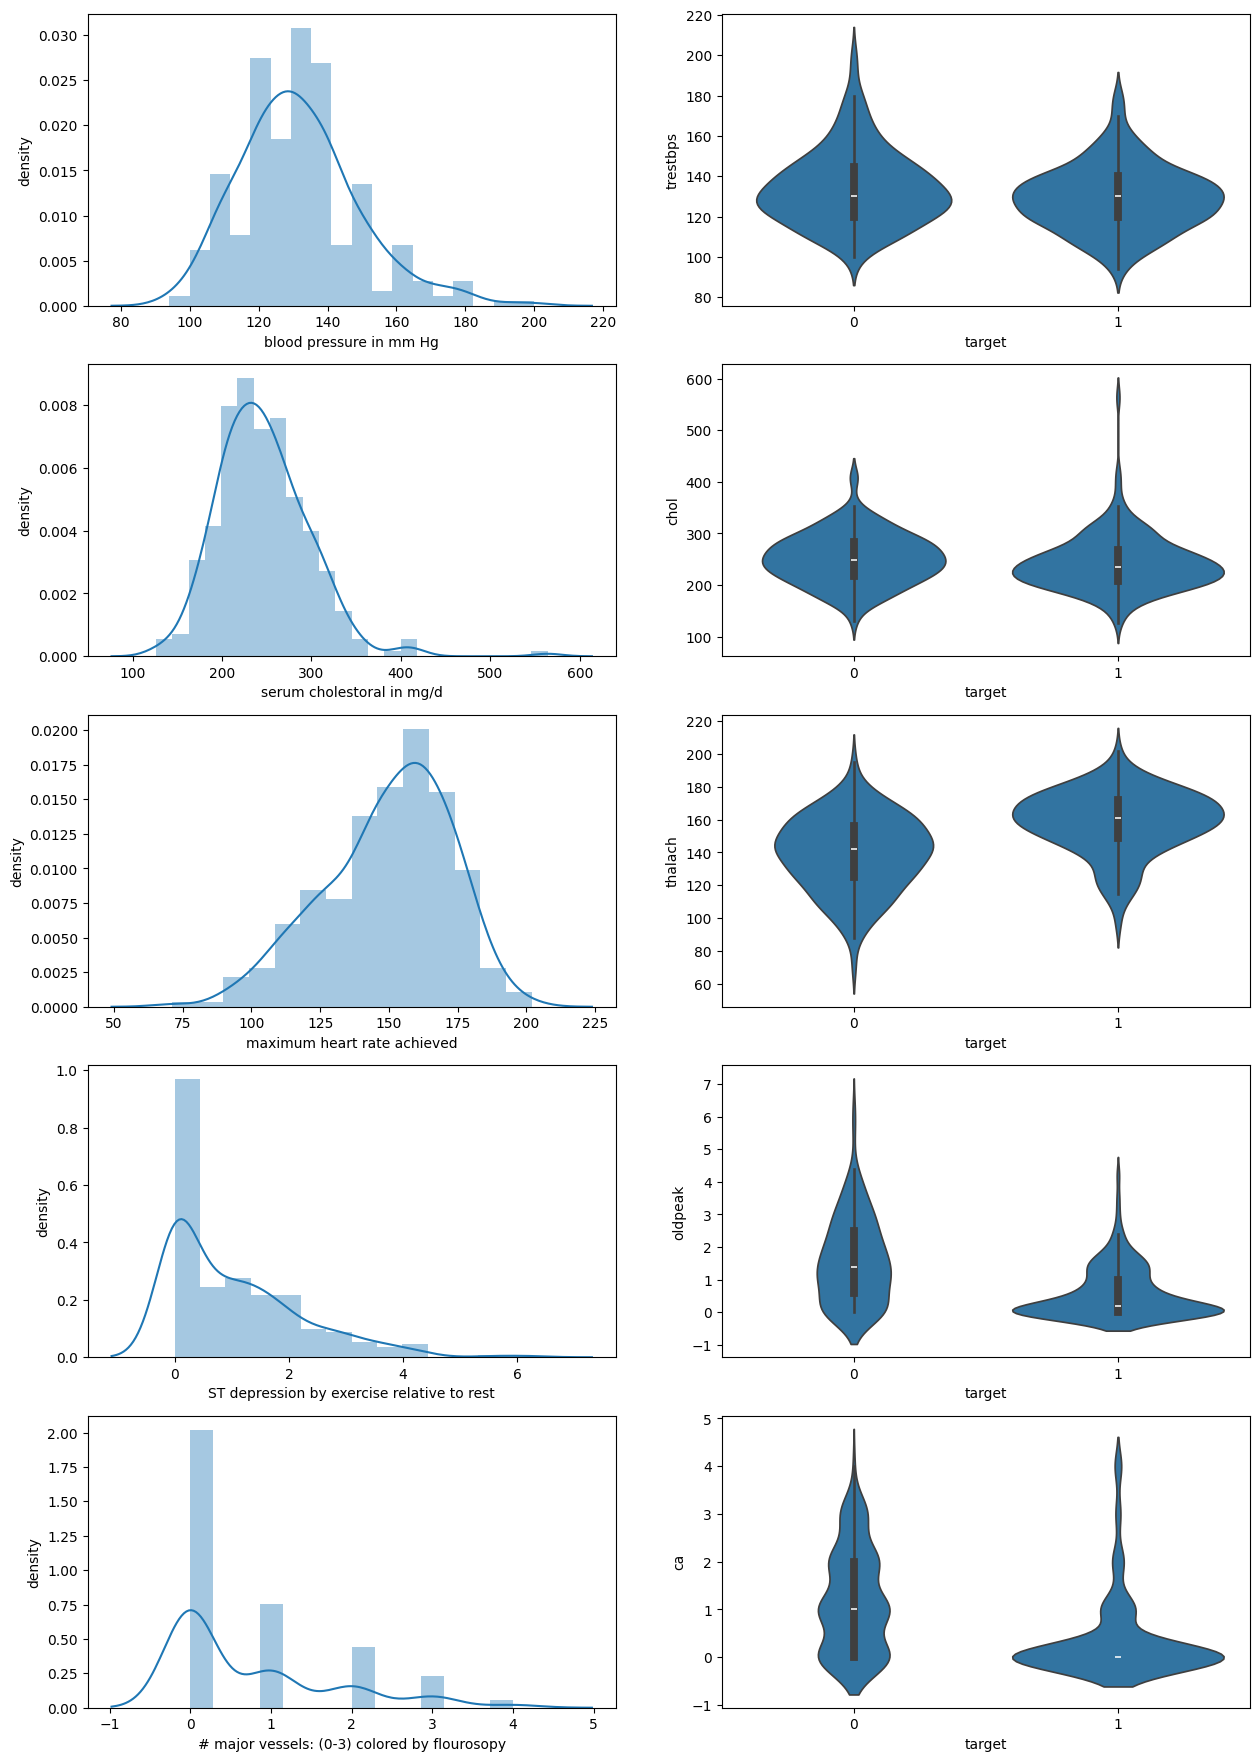

In [ ]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

##3.Show the Heart Disease Frequency with respect to age-groups.


Representation of Heart Disease Frequency with respect to age-groups using Bar graph.

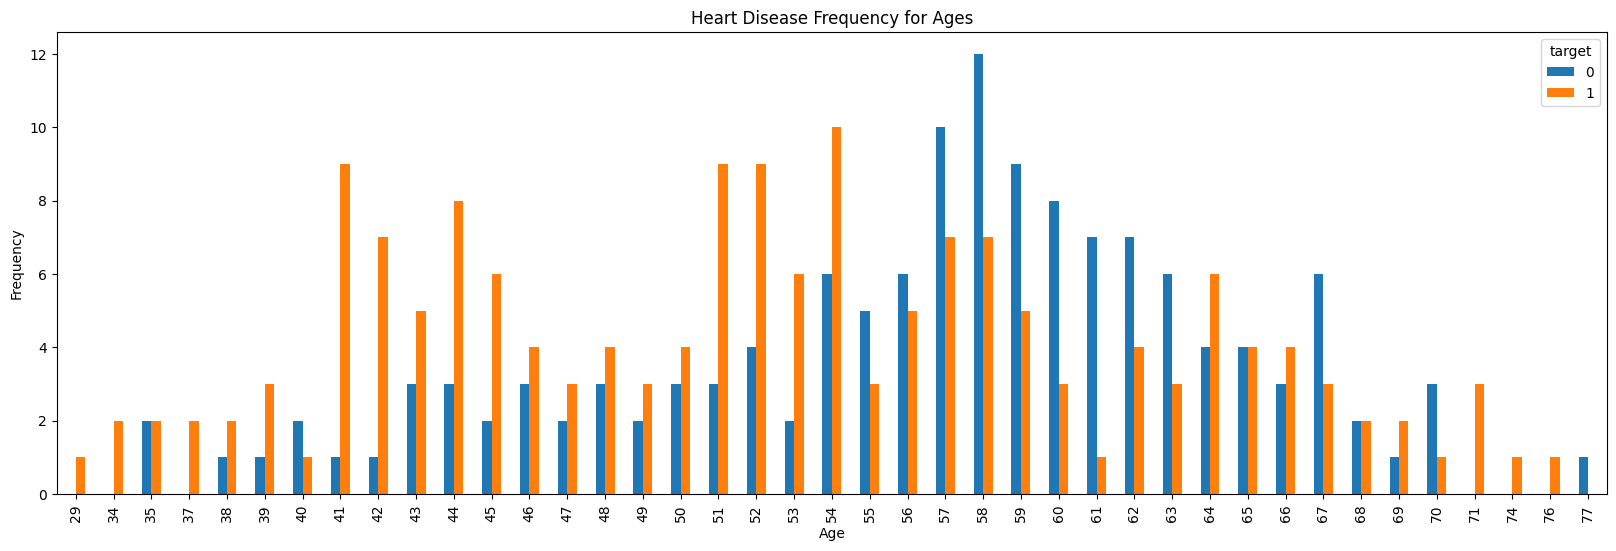

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('heartDiseaseAndAges.png')
plt.show()

>**Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)**

Representation of Heart Disease Frequency with respect to age-groups using Scatter Plot

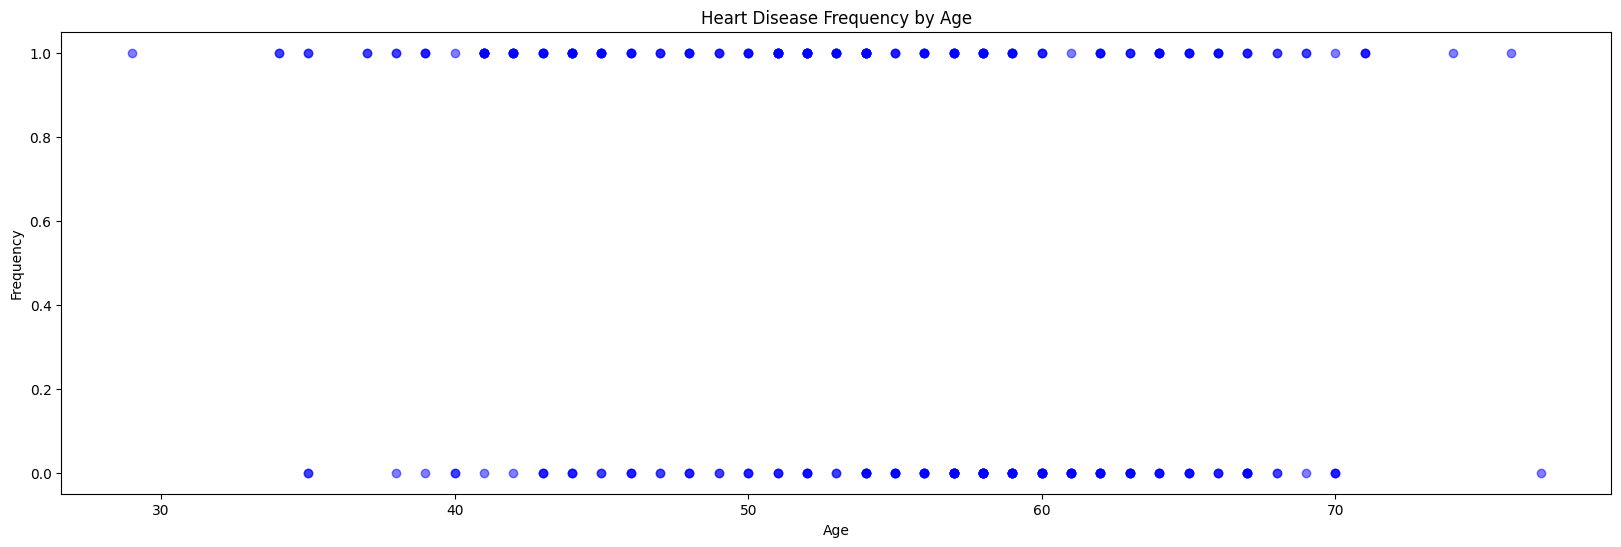

In [ ]:
plt.figure(figsize=(20, 6))
plt.scatter(data['age'], data['target'], marker='o', color='blue', alpha=0.5)
plt.title('Heart Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Show Heart Disease Frequency with respect to Sex


Representation by bar graph


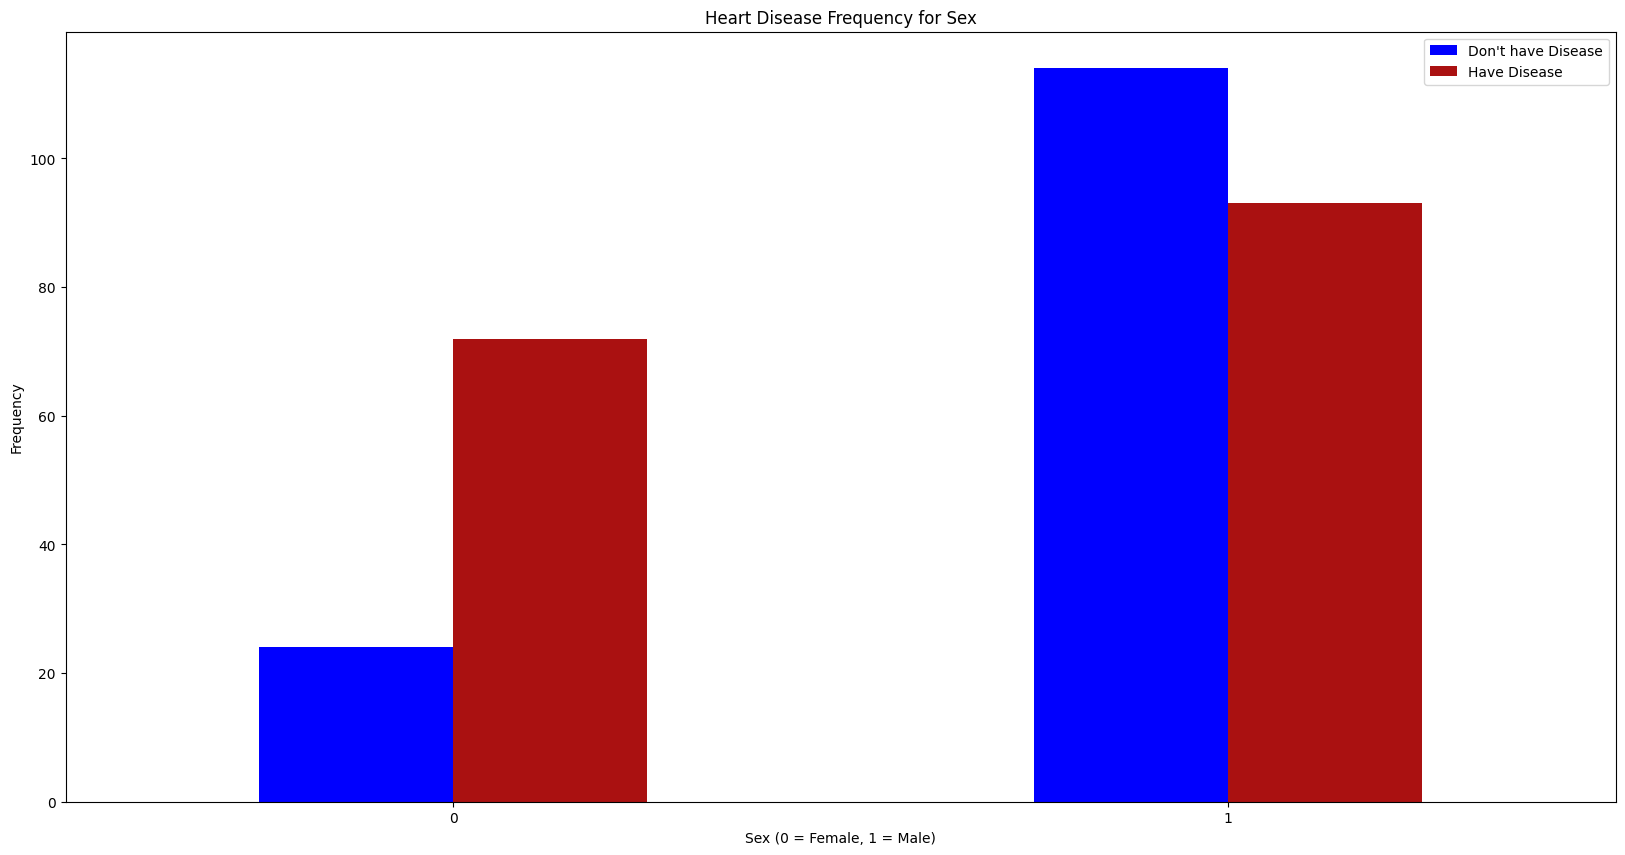

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Representation by pie chart


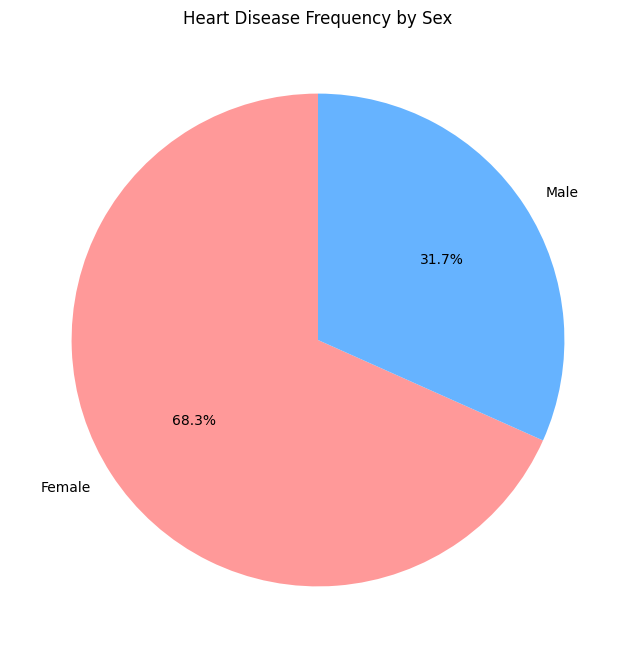

In [ ]:
plt.figure(figsize=(8, 8))
sex_counts = data['sex'].value_counts()
labels = ['Female', 'Male']
colors = ['#FF9999', '#66B3FF']
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Frequency by Sex')
plt.show()

## Renaming the columns

In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## What is the Heart diseases Data according to Fasting Blood sugar?

representation by bar plot

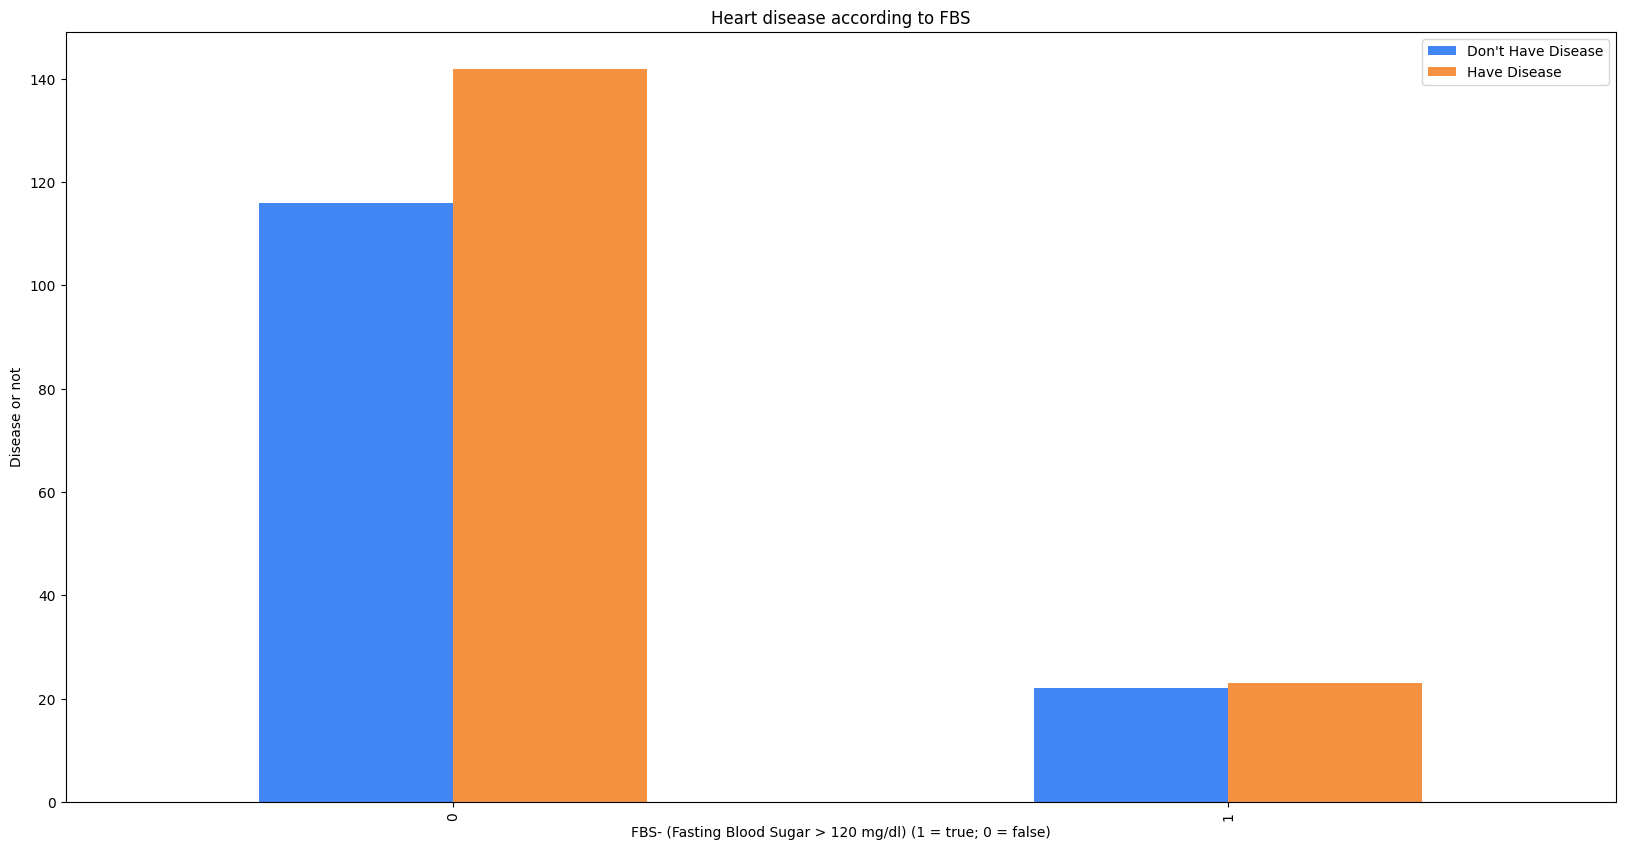

In [ ]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

Representaion using pie graph and groupby

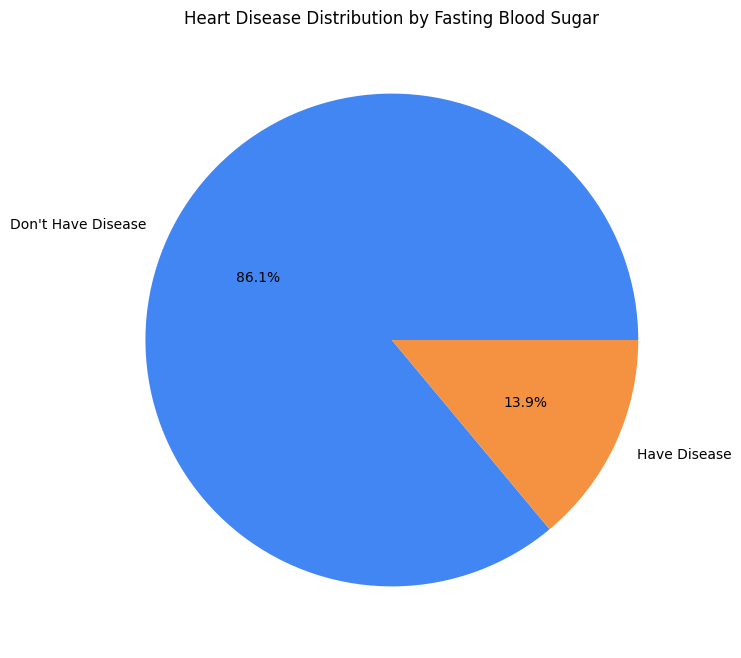

In [ ]:
# Calculate the number of patients with and without heart disease based on fasting blood sugar
fbs_counts = data.groupby('fasting_blood_sugar')['target'].value_counts().unstack()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fbs_counts[1], labels=["Don't Have Disease", "Have Disease"], autopct='%1.1f%%', colors=['#4286f4', '#f49242'])
plt.title("Heart Disease Distribution by Fasting Blood Sugar")
plt.show()

## What is the Heart diseases Data according to Fasting Blood sugar by individual groups? ~ groupby approach

Groupby Approach

## Analyses of the chest pain ?

(4 types of chest pain)

> * 1: Typical angina
> * 2: Atypical angina
> * 3: Non-anginal pain
> * 4: Asymptomatic

In [ ]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='chest_pain_type', ylabel='target'>

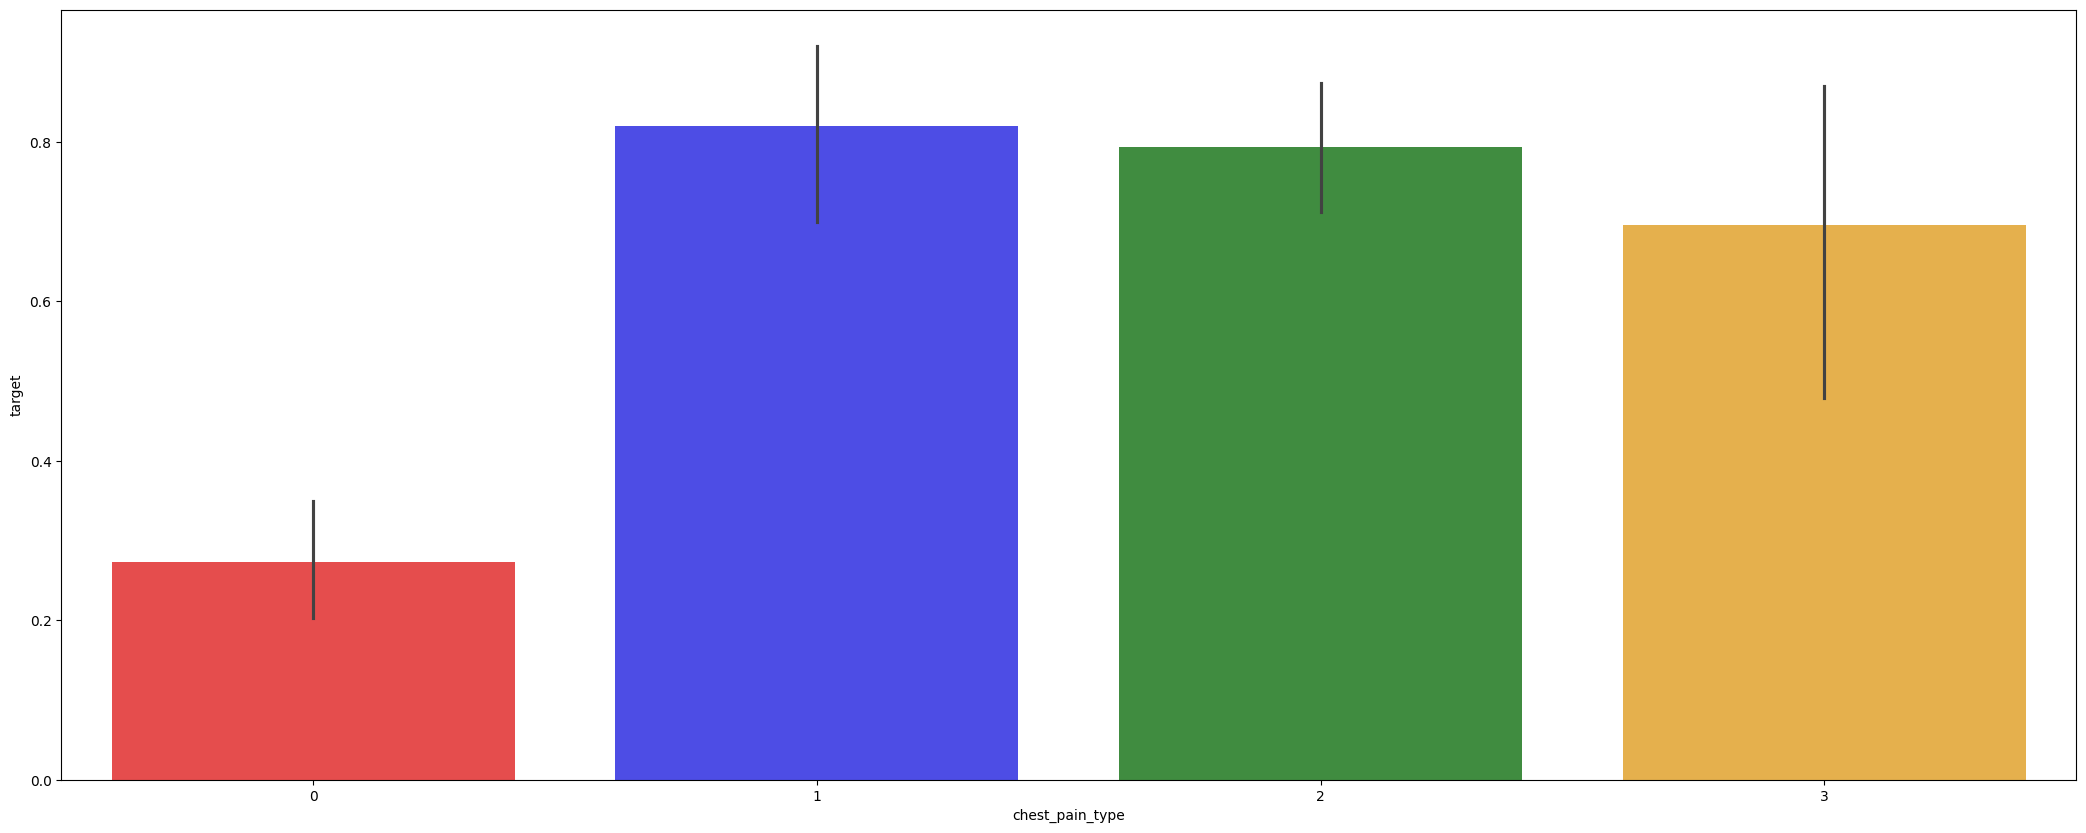

In [ ]:
custom_palette = {'0': 'red', '1': 'blue', '2': 'green', '3': 'orange'}

plt.figure(figsize=(26, 10))
sns.barplot(x=data.chest_pain_type, y=data.target, palette=custom_palette, alpha= 0.8)


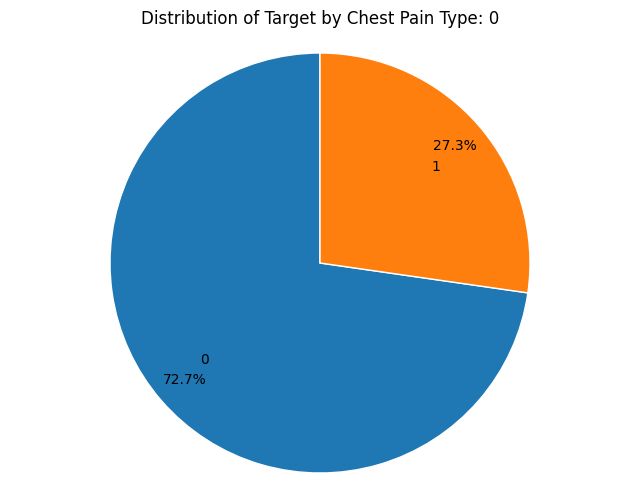

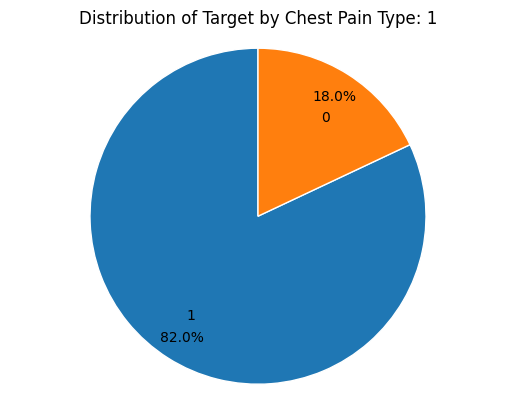

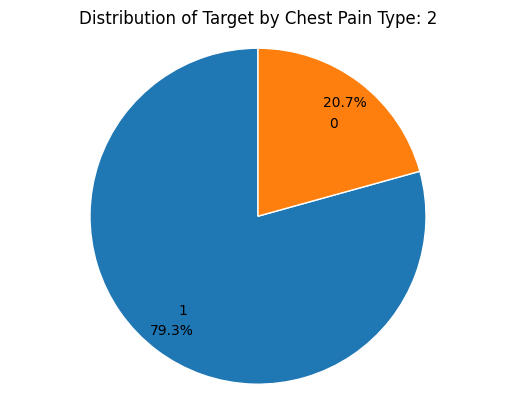

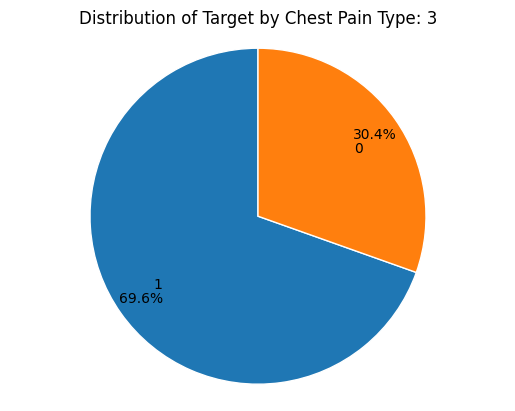

In [ ]:
# Group the data by 'chest_pain_type' and calculate the count of each 'target' value
grouped_data = data.groupby('chest_pain_type')['target'].value_counts()

# Create a pie chart for each group
plt.figure(figsize=(8, 6))
for chest_pain_type, counts in grouped_data.groupby(level=0):
    plt.pie(counts, labels=counts.index.get_level_values(1), autopct='%1.1f%%', startangle=90,
            labeldistance=0.7, wedgeprops={'edgecolor': 'w', 'linewidth': 1}, pctdistance=0.85)
    plt.title(f'Distribution of Target by Chest Pain Type: {chest_pain_type}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Representing using pie chart and groupby

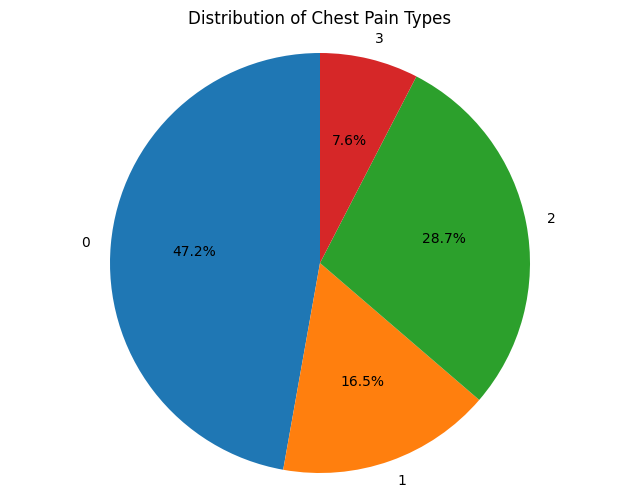

In [ ]:
grouped_data = data.groupby('chest_pain_type').size()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Chest Pain Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

## Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [ ]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<Axes: xlabel='resting_blood_pressure', ylabel='target'>

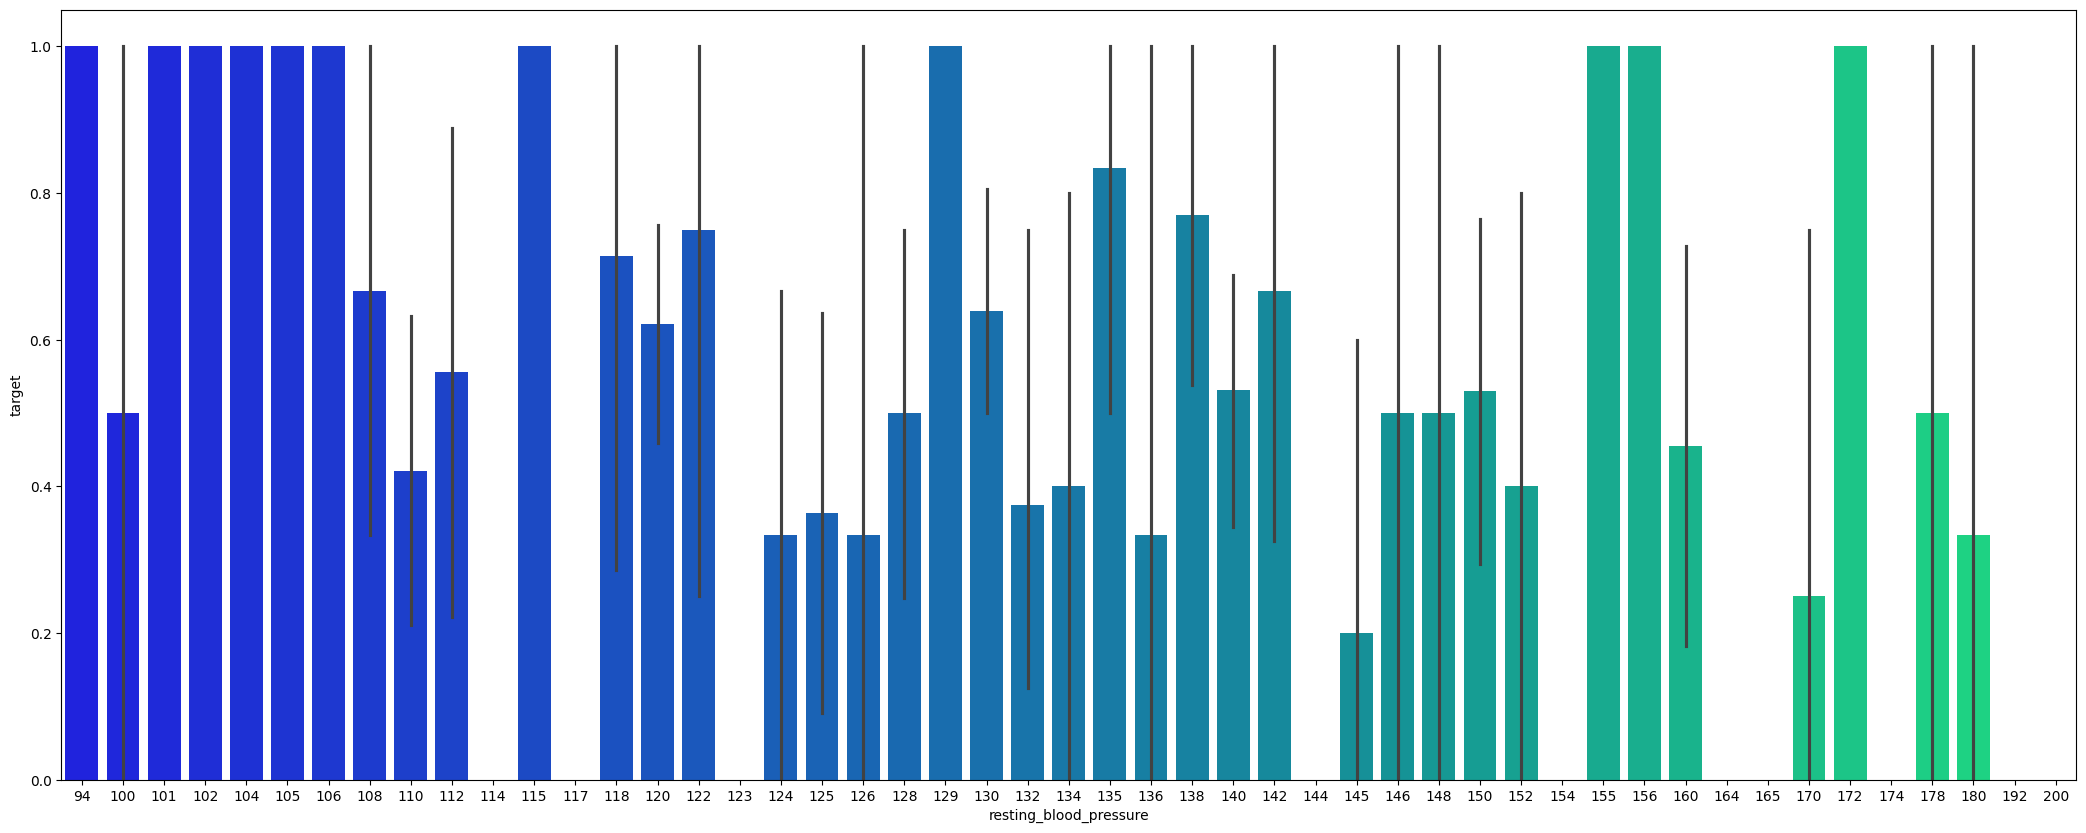

In [ ]:
plt.figure(figsize=(26, 10))

sns.barplot(x=data.resting_blood_pressure,y=data.target, palette='winter')

## What is the analyses of the Resting electrocardiographic measurement in patients

> * 0 = normal
> * 1 = having ST-T wave abnormality
> * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

In [ ]:
data["rest_ecg"].unique()

array([0, 1, 2])

<Axes: xlabel='rest_ecg', ylabel='target'>

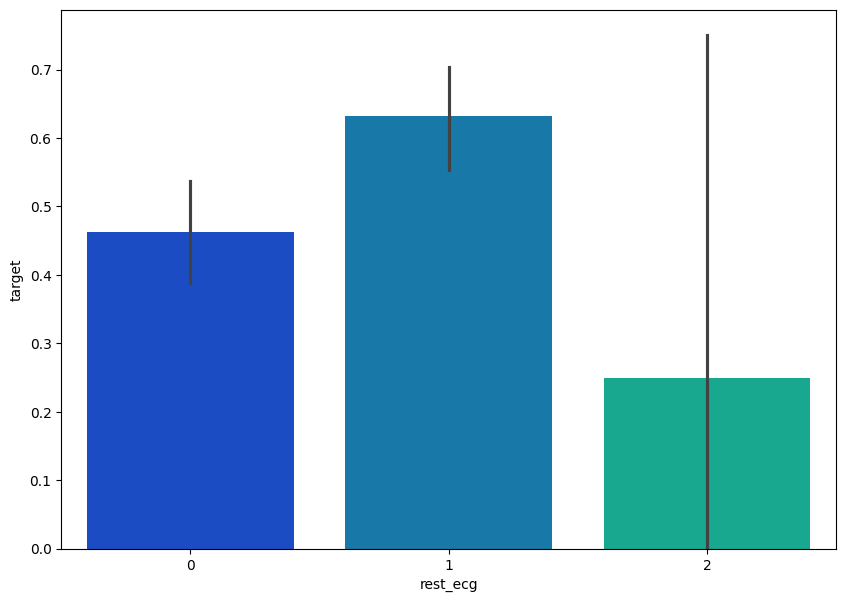

In [ ]:
plt.figure(figsize=(10, 7))

sns.barplot(x=data.rest_ecg,y = data.target, palette='winter' )

> **people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

## what is the analyses of exercise induced angina
> * 1 = yes
> * 0 = no

In [ ]:
data["exercise_induced_angina"].unique()

array([0, 1])

<Axes: xlabel='exercise_induced_angina', ylabel='target'>

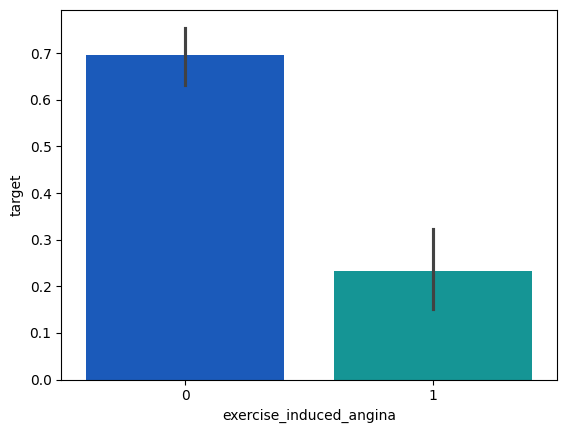

In [ ]:
sns.barplot(x=data.exercise_induced_angina,y=data.target, palette = 'winter')

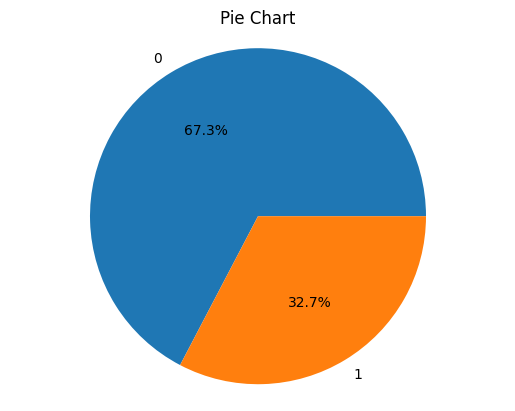

In [ ]:
counts = data['exercise_induced_angina'].value_counts()

# Plotting the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', )
plt.title('Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## What is the status of the slope of peak exercise ST segment
> * 0: upsloping
> * 1: flat
> * 2: downsloping

In [ ]:
data['st_slope'].unique()

KeyError: 'st_slope'

<Axes: xlabel='st_slope', ylabel='target'>

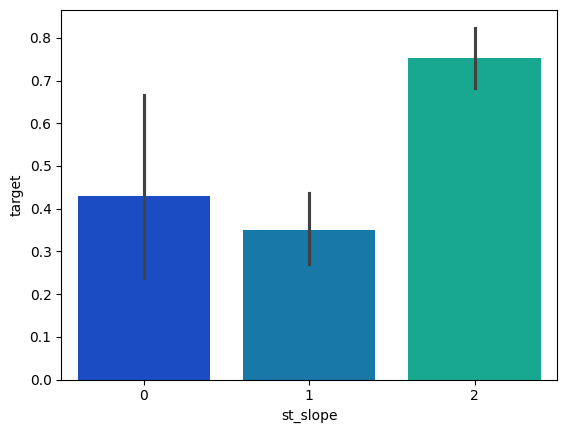

In [ ]:
sns.barplot(x= data.st_slope,y = data.target, palette = 'winter')

> **sns.barplot(data["st_slope"],y)**

## Analysing number of major vessels (0-3) colored by flourosopy

In [ ]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4])

> **count num_major vessels**

<Axes: xlabel='num_major_vessels', ylabel='count'>

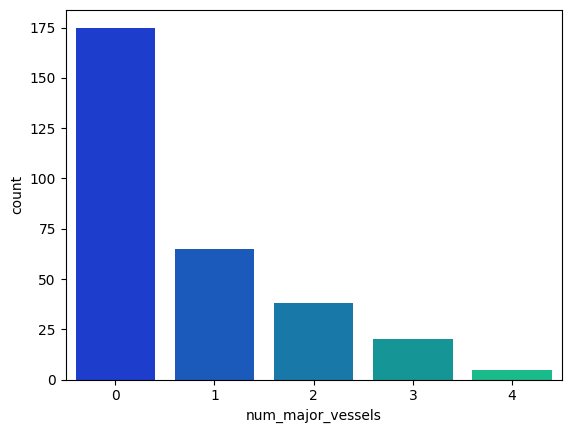

In [ ]:
sns.countplot(x=data.num_major_vessels, data=data, palette = 'winter')

<Axes: xlabel='num_major_vessels', ylabel='target'>

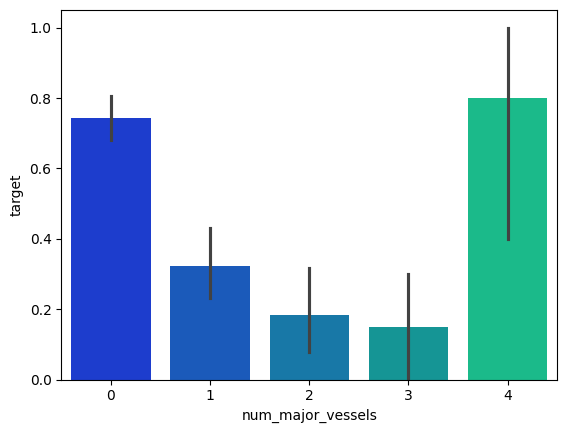

In [ ]:
sns.barplot(x=data.num_major_vessels,y= data.target, palette='winter')

 **comparing with target**
>num_major_vessels=4 has astonishingly large number of heart patients

## Analysing A blood disorder called thalassemia
> * 3 = normal
>* 6 = fixed defect
>* 7 = reversable defect

In [ ]:
data["thalassemia"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thalassemia', ylabel='Density'>

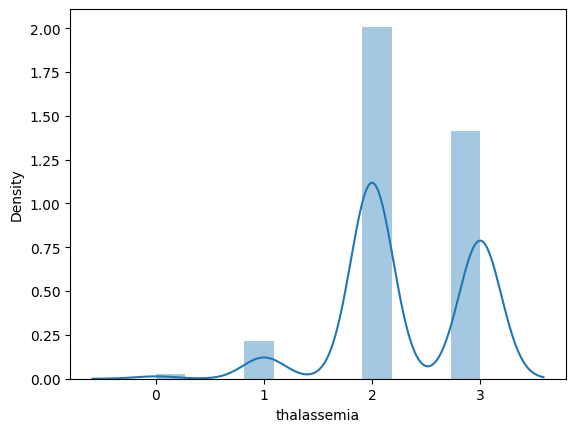

In [ ]:
sns.distplot(data["thalassemia"])

> **plotting the thalassemia distribution (0,1,2,3)**

<Axes: xlabel='thalassemia', ylabel='target'>

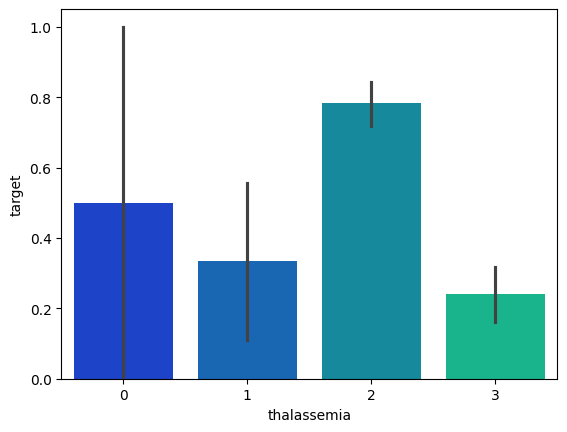

In [ ]:
sns.barplot(x=data.thalassemia,y = data.target, palette = 'winter')

> **comparing with target**

## thalassemia and cholesterol scatterplot

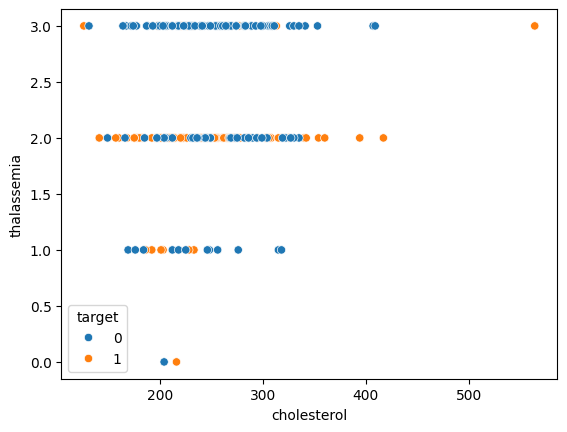

In [ ]:
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

## thalassemia vs resting blood pressure scatterplot

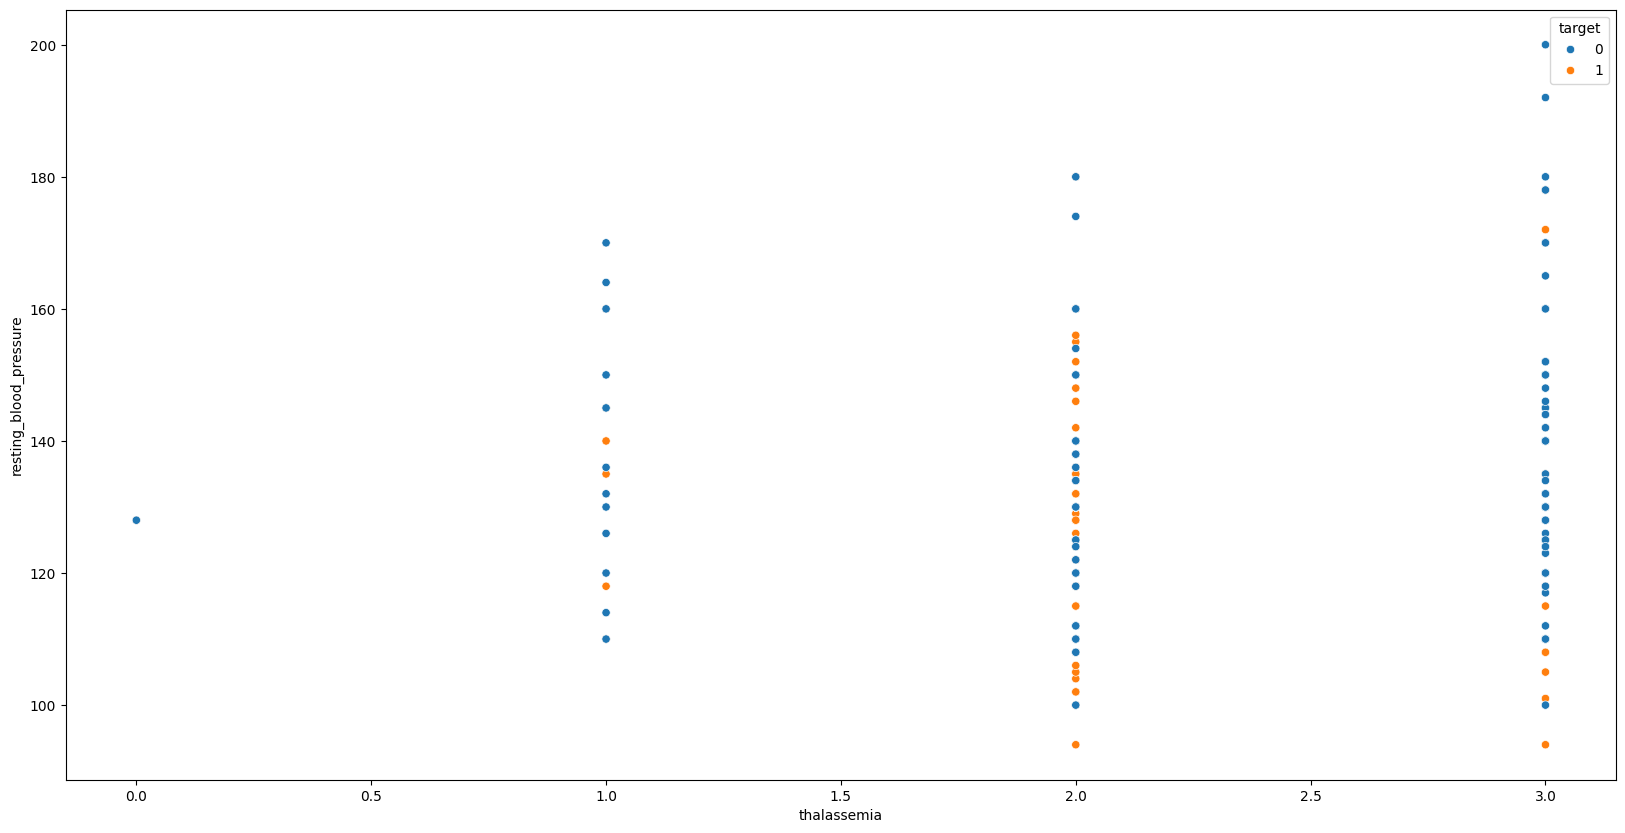

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

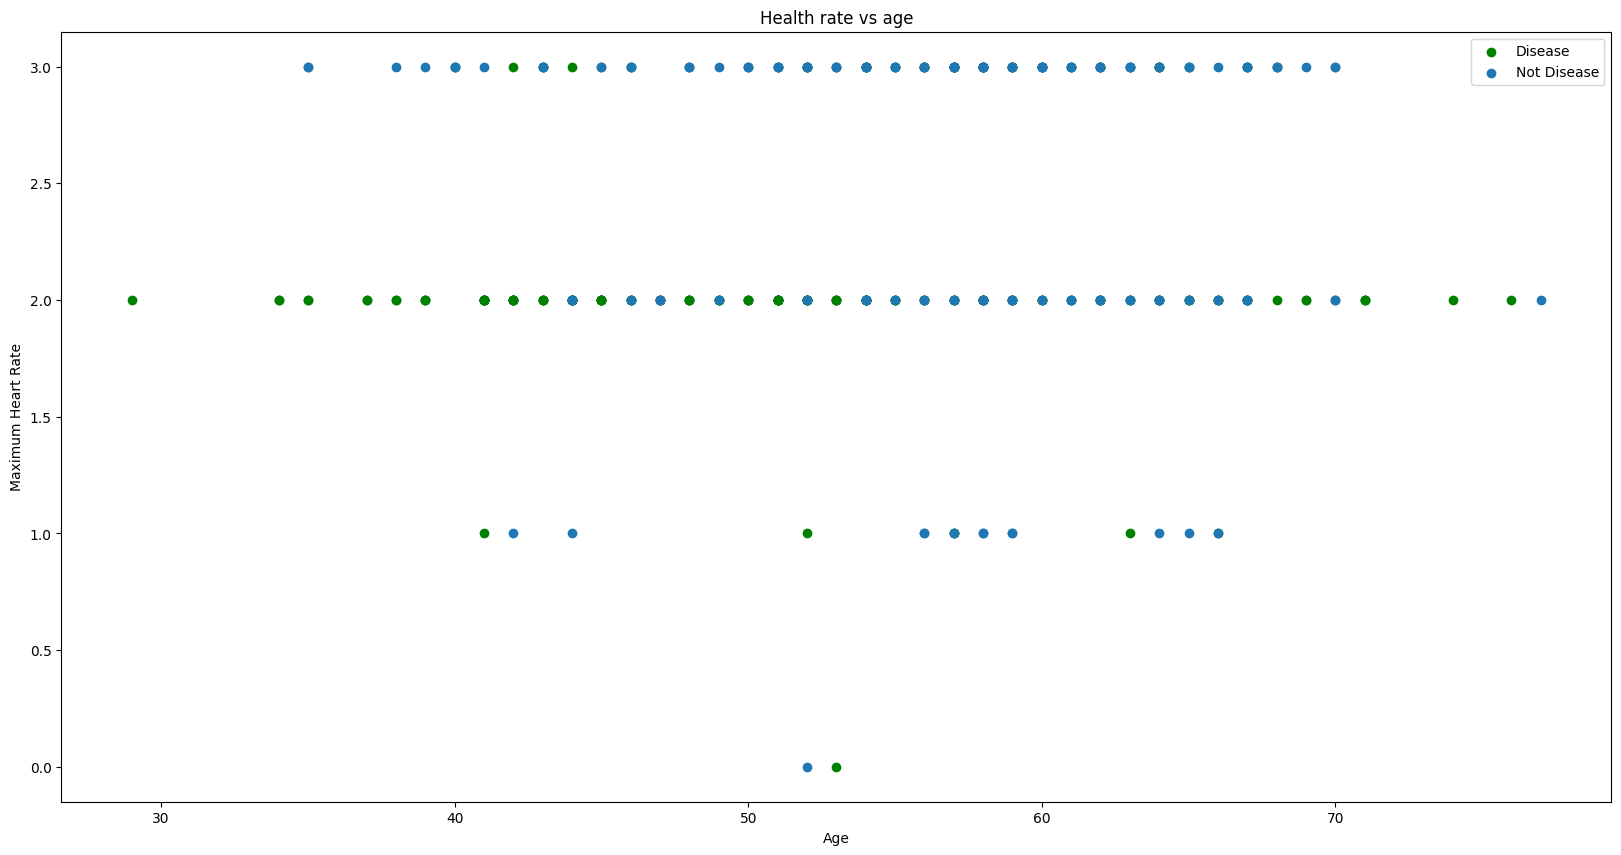

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.title('Health rate vs age')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

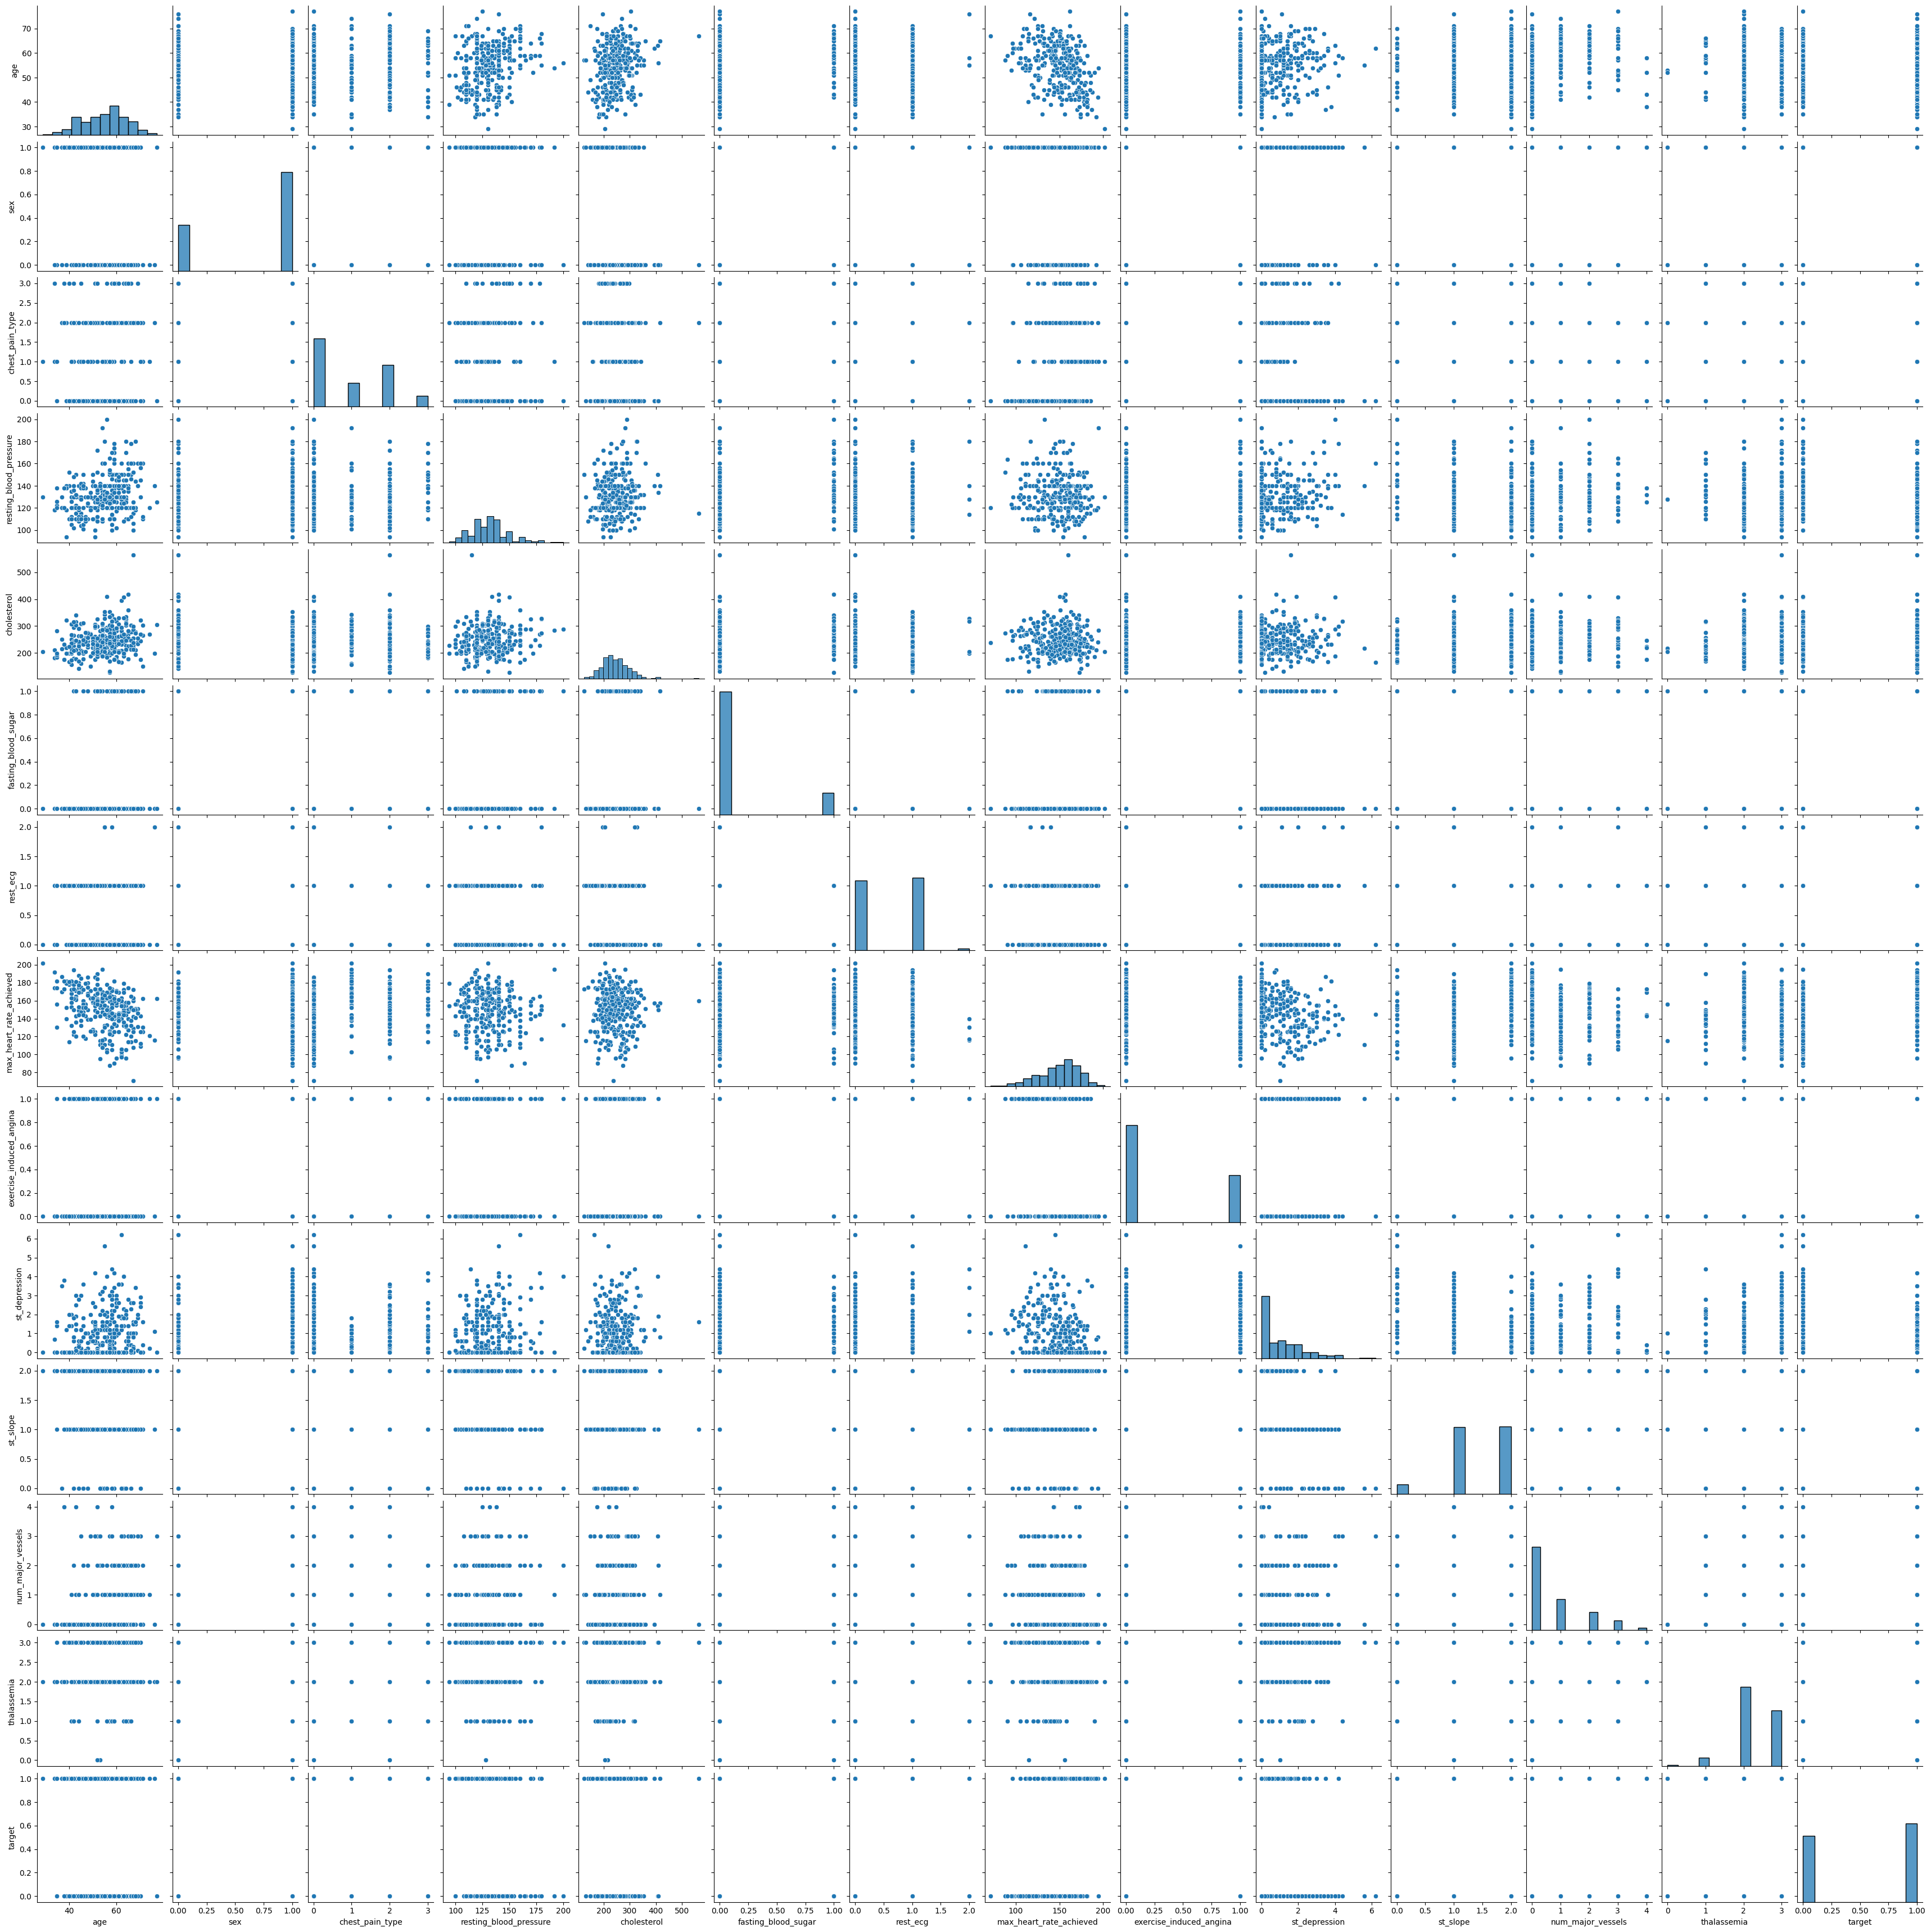

In [ ]:
sns.pairplot(data=data)

<Figure size 1700x1000 with 0 Axes>

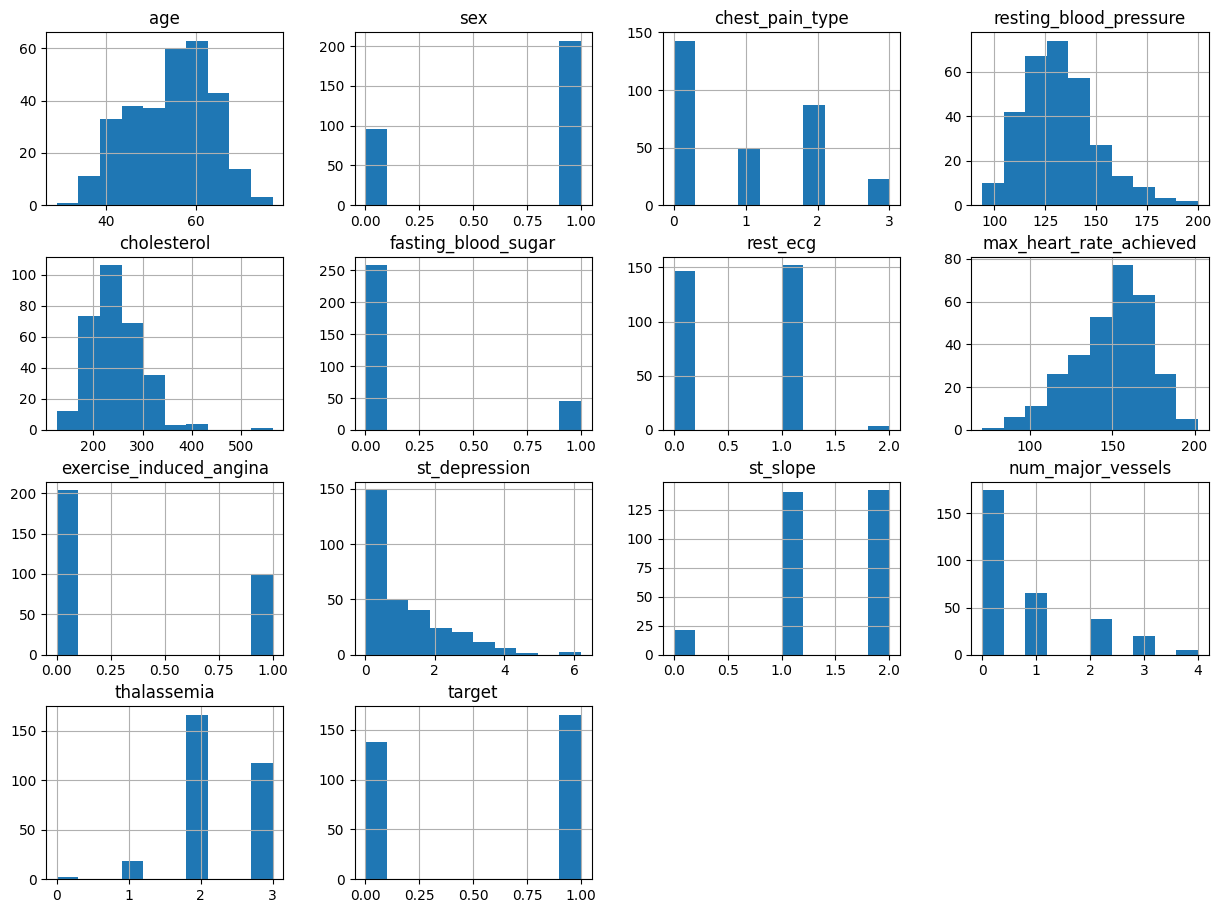

In [ ]:
data.hist(figsize=(15,11))
plt.show()

## Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [ ]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

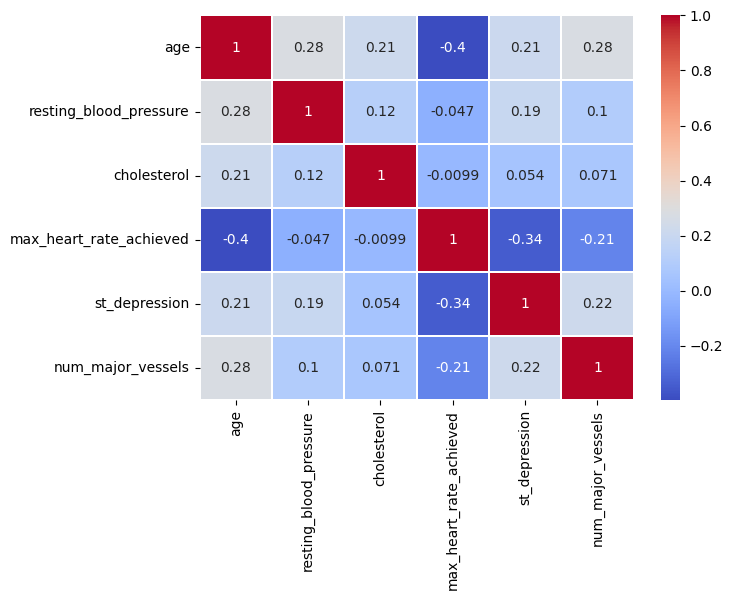

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

## Correlation analysis

In [ ]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1
